In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

# Importing data
df = pd.read_csv('/content/drive/MyDrive/ZR.csv',index_col='Timestamp') # Use Timestamp as index

df.iloc[:,0] = pd.to_numeric(df.iloc[:,0],errors='coerce')
#df.dropna(inplace=True)
#Printing head
df.head()

dataset = pd.DataFrame(df)
print(dataset)
# summary statistics
#print(df.describe())

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html
dataset = dataset.interpolate()
df = dataset

print("After interpolation ....")

print(df)

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


             Close
Timestamp         
1325317920    4.39
1325317980     NaN
1325318040     NaN
1325318100     NaN
1325318160     NaN
...            ...
1388232120  734.55
1388232180  730.71
1388232240  730.51
1388232300  731.10
1388232360  734.00

[1048575 rows x 1 columns]
After interpolation ....
             Close
Timestamp         
1325317920    4.39
1325317980    4.39
1325318040    4.39
1325318100    4.39
1325318160    4.39
...            ...
1388232120  734.55
1388232180  730.71
1388232240  730.51
1388232300  731.10
1388232360  734.00

[1048575 rows x 1 columns]


In [ ]:
#Printing tail
df.tail()

,Close
Timestamp,
1388232120,734.55
1388232180,730.71
1388232240,730.51
1388232300,731.10
1388232360,734.00


In [ ]:
#Subsetting the dataset
#Index 11856 marks the end of year 2013
#df = pd.read_csv('TimeSeriesTrain.csv', nrows = 11856)

#Creating train and test set 
#Index 10392 marks the end of October 2013

n_row = df.shape[0]
train_n_row = int(n_row * 0.8) 
train=df[0:train_n_row] 
test=df[train_n_row:]

df=df.dropna()
train=train.dropna()
test=test.dropna()

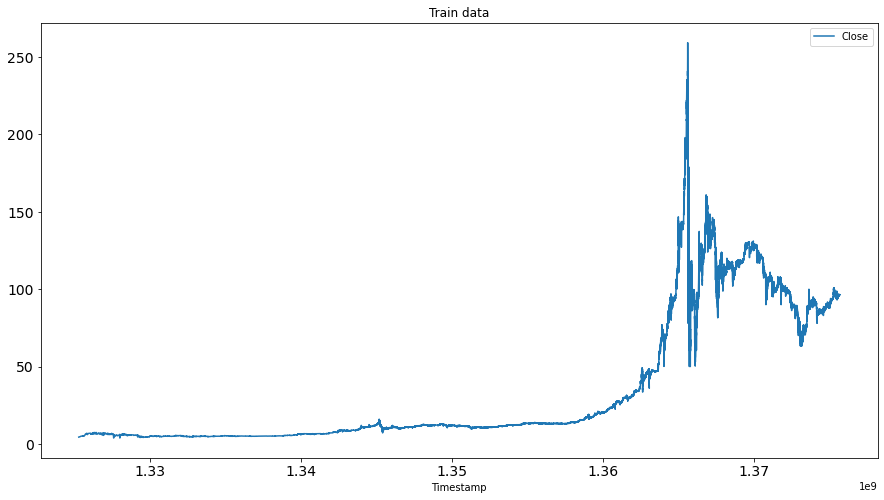

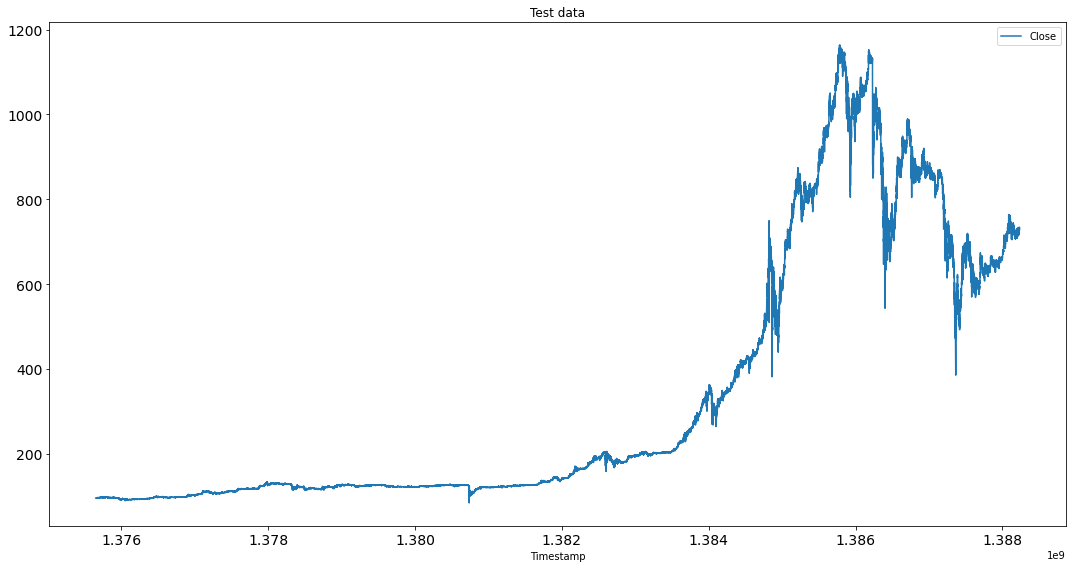

In [ ]:
#Plotting data
train.plot(figsize=(15,8), title= 'Train data', fontsize=14)
test.plot(figsize=(15,8), title= 'Test data', fontsize=14)
plt.tight_layout()
plt.show()

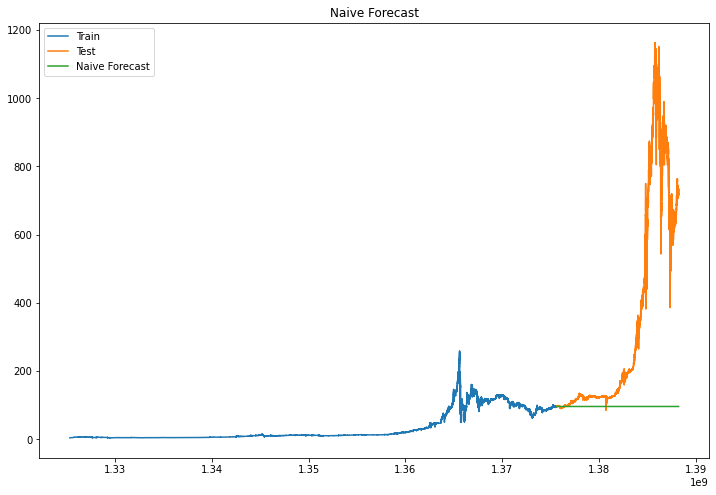

In [ ]:
dd= np.asarray(train.iloc[:,0])
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train.iloc[:,0], label='Train')
plt.plot(test.index,test.iloc[:,0], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.iloc[:,0], y_hat.naive))
print(rms)


393.4657920452294


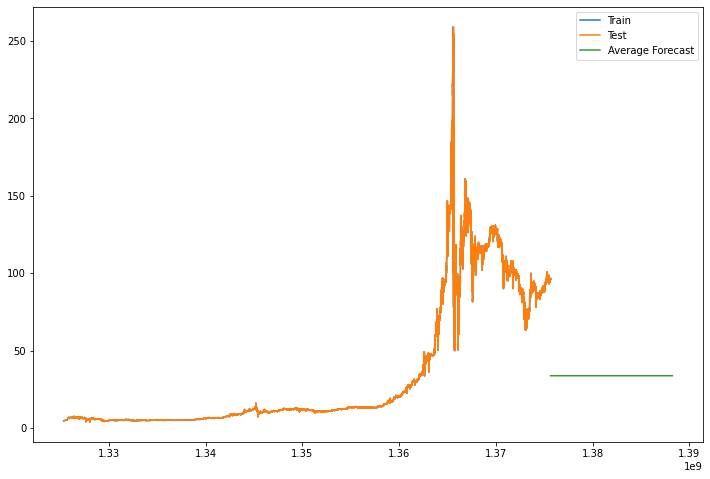

In [ ]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train.iloc[:,0].mean()
plt.figure(figsize=(12,8))
plt.plot(train.iloc[:,0], label='Train')
plt.plot(train.iloc[:,0], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [ ]:
print(test.iloc[:,0])
print("====")
print("====")
print(y_hat_avg.avg_forecast)
rms = sqrt(mean_squared_error(test, y_hat_avg.avg_forecast))
print(rms)

Timestamp
1375649520     96.340
1375649580     96.340
1375649640     96.340
1375649700     96.345
1375649760     96.350
               ...   
1388232120    734.550
1388232180    730.710
1388232240    730.510
1388232300    731.100
1388232360    734.000
Name: Close, Length: 209715, dtype: float64
====
====
Timestamp
1375649520    33.721593
1375649580    33.721593
1375649640    33.721593
1375649700    33.721593
1375649760    33.721593
                ...    
1388232120    33.721593
1388232180    33.721593
1388232240    33.721593
1388232300    33.721593
1388232360    33.721593
Name: avg_forecast, Length: 209715, dtype: float64
434.75992528480475


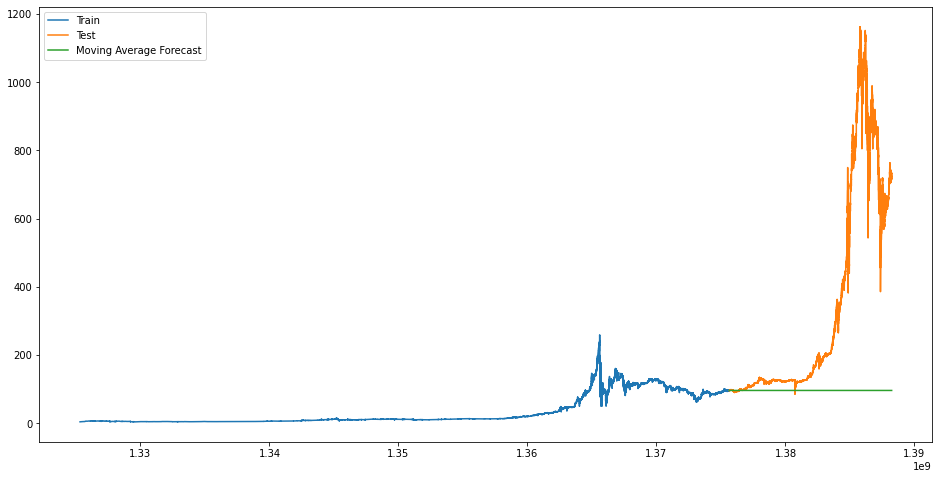

In [ ]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train.iloc[:,0].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(test, y_hat_avg.moving_avg_forecast))
print(rms)

393.4104833359711


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


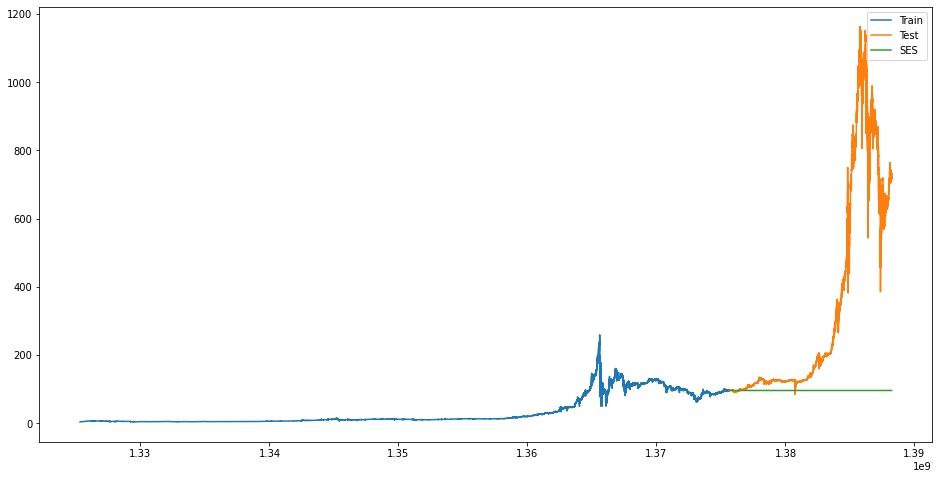

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train.iloc[:,0])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()


In [ ]:
rms = sqrt(mean_squared_error(test, y_hat_avg.SES))
print(rms)

393.464392510533


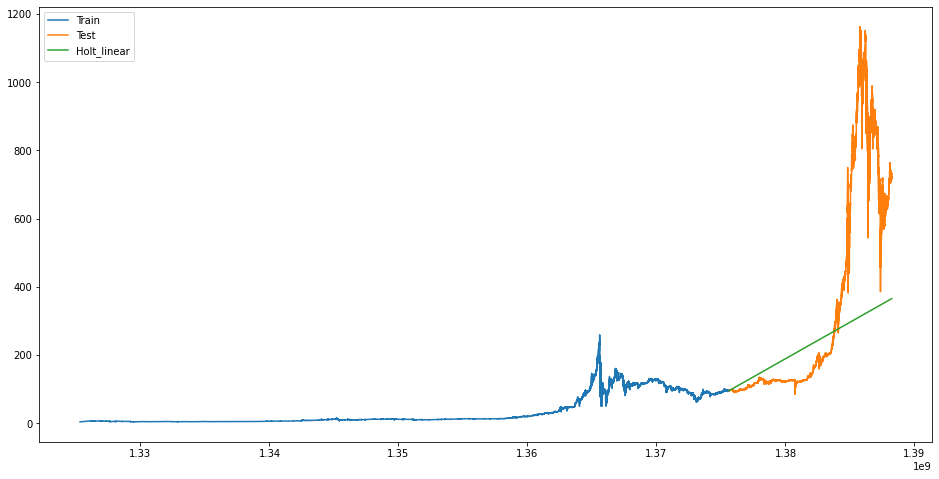

In [ ]:
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train.iloc[:,0])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(test, y_hat_avg.Holt_linear))
print(rms)

272.81217034285294


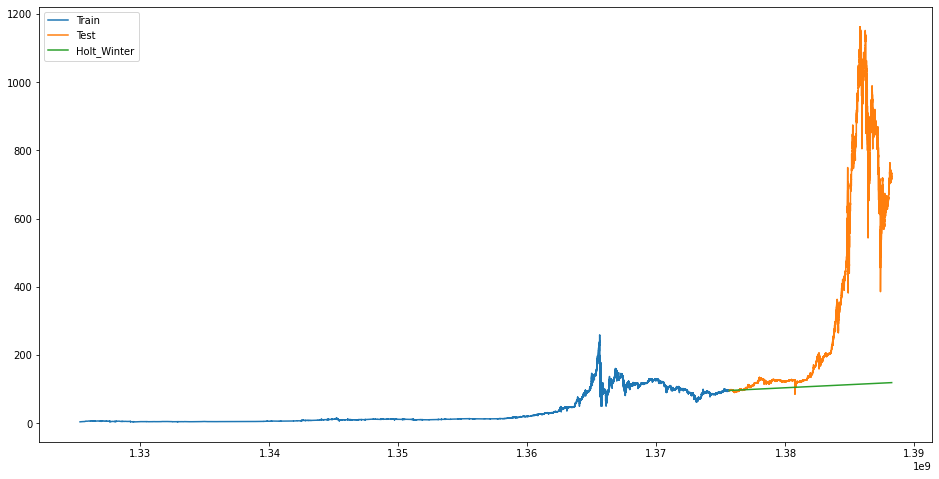

In [ ]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train.iloc[:,0]) ,seasonal_periods=7 ,trend='add', seasonal='Addictive',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(test, y_hat_avg['Holt_Winter']))
print(rms)

382.1618960969436


In [ ]:
import statsmodels.api as sm

y_hat_avg = test.copy()

# Seasonal Arima = Sarima


# Order: default (1,0,0). <- AR(1) model 
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html


fit1 = sm.tsa.statespace.SARIMAX(np.asarray(train.iloc[-5000:,0]), seasonal_order=(1,1,1,12)).fit()
y_hat_avg['SARIMA'] = fit1.forecast(len(test))



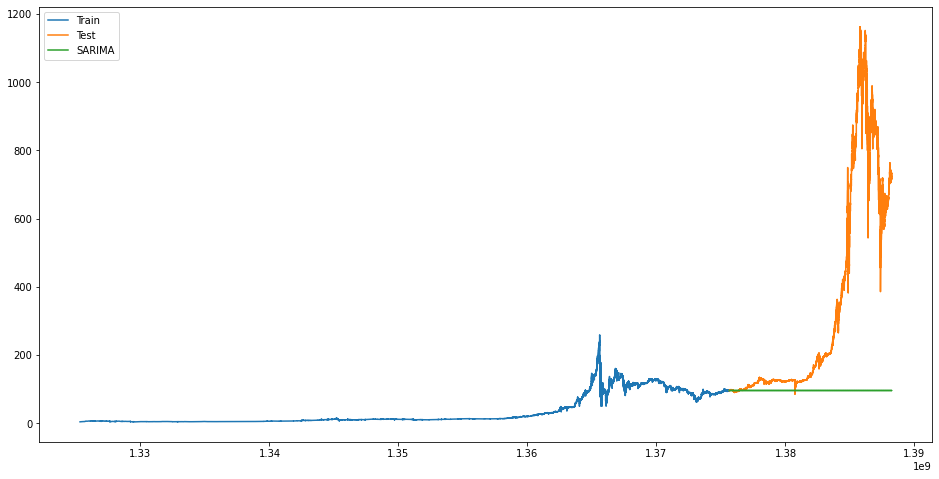

In [ ]:
plt.figure(figsize=(16,8))
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [ ]:
y_hat_avg

,Close,SARIMA
Timestamp,,
1375649520,96.340,96.326095
1375649580,96.340,96.327319
1375649640,96.340,96.319100
1375649700,96.345,96.320285
1375649760,96.350,96.317831
...,...,...
1388232120,734.550,96.293035
1388232180,730.710,96.294698
1388232240,730.510,96.291291


In [ ]:
rms = sqrt(mean_squared_error(test, y_hat_avg.SARIMA.dropna()))
print(rms)

393.48886562308877
